In [ ]:
"""
a Google Colab notebook to test the CNN neural network as implemented here:
https://github.com/saikat15010/Brain-Tumor-Detection/blob/main/CNN%20on%20Figshare%20Dataset.ipynb
Code in this notebook is copied as closely from the source as possible, except for comments and changes
to the file directory path due to issues specific on my end.

Since the CNN on Harvard notebook is crashing on an issue I do not understand,
I will put that on hold and try to figure this out first.
"""

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
import numpy
import matplotlib.pyplot as plt
import h5py
import cv2
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
data_dir='../gdrive/MyDrive/healthcare research data/Brain_MRI2/BRAIN_DATA'
total_image=3064
trainindata=[]
for i in range(1,total_image+1):
  filename=str(i)+".mat"
  data=h5py.File(os.path.join(data_dir,filename),"r")
  trainindata.append(data)

  if i%100==0:
    print(filename)

100.mat
200.mat
300.mat
400.mat
500.mat
600.mat
700.mat
800.mat
900.mat
1000.mat
1100.mat
1200.mat
1300.mat
1400.mat
1500.mat
1600.mat
1700.mat
1800.mat
1900.mat
2000.mat
2100.mat
2200.mat
2300.mat
2400.mat
2500.mat
2600.mat
2700.mat
2800.mat
2900.mat
3000.mat


In [ ]:
print(trainindata[5])

<HDF5 file "6.mat" (mode r)>


In [ ]:
import keras
import random
random.shuffle(trainindata)

In [ ]:
import numpy as np
 # Now take all the image as train and test
trainx=[]
trainy=[]
testx=[]
testy=[]

"""
Note from the person replicating this:
On one hand I feel like all of this can be done via train_test_split().
On the other hand this is supposed to replicate the code exactly
and not add changes that might break it.

Updated from trainindata.value to trainindata[()] to resolve
a deprecation issue.
"""

size=round(4*total_image/5) # Split the dataset into 80:20
# For trainx and trainy
for i in range(size):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    trainx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    trainy.append(label)
# For trainx and trainy
for i in range(size,total_image):
  image=trainindata[i]["cjdata"]["image"][()]
  if image.shape==(512,512):
    image=np.expand_dims(image,axis=0)
    testx.append(image)

    label=int(trainindata[i]["cjdata"]["label"][()])-1
    testy.append(label)

In [ ]:
# Converting list to numpy array
trainx=np.array(trainx).reshape(-1,512,512,1)
testx=np.array(testx).reshape(-1,512,512,1)
trainy=np.array(trainy)
testy=np.array(testy)

In [ ]:
print(testy)

[0 1 1 1 1 1 0 2 1 1 1 0 1 0 0 1 1 2 0 0 2 0 0 2 0 2 1 1 0 1 2 0 0 2 1 1 0
 1 2 2 1 2 1 1 1 1 1 2 1 2 2 2 2 2 0 1 1 0 0 1 0 1 1 2 0 2 1 1 1 1 1 1 2 1
 2 1 1 0 1 0 1 0 1 1 1 1 2 2 1 1 0 1 0 2 0 0 1 1 1 1 1 0 2 1 1 1 1 2 1 2 0
 2 1 0 1 0 1 1 1 2 0 2 0 1 2 2 2 0 2 0 1 0 0 2 2 0 1 0 0 2 2 2 2 0 2 0 0 1
 1 0 2 2 2 1 0 2 1 1 0 1 2 2 1 0 2 0 2 1 1 1 2 1 2 0 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 1 2 1 1 0 2 2 1 2 2 1 2 0 0 1 2 1 2 0 1 2 1 1 1 0 0 1 2 2 1 2 1 1 1
 1 1 1 1 2 1 1 1 0 1 0 2 1 1 1 1 1 2 0 2 1 0 1 1 2 1 1 0 1 1 1 0 1 0 2 2 1
 2 2 0 1 0 1 2 2 1 2 1 1 2 1 1 1 2 1 0 2 1 0 0 0 0 1 0 2 2 2 2 1 2 0 1 1 1
 2 1 1 1 2 2 2 2 1 1 0 1 1 2 0 1 2 1 0 0 0 1 2 1 0 1 1 1 1 0 1 1 1 1 2 0 2
 1 1 2 0 1 1 1 0 0 2 1 0 2 1 2 0 2 0 2 2 1 2 1 0 1 1 0 1 0 1 2 2 2 2 1 0 2
 2 1 2 2 1 1 1 1 2 1 2 2 1 2 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 2 2 1 2 2 2 1 0
 1 1 2 1 2 1 1 1 2 0 2 1 2 1 1 1 0 1 2 0 2 2 1 2 1 1 1 1 0 2 2 1 2 0 2 2 1
 1 1 2 2 1 1 2 1 0 0 0 2 2 0 1 1 1 1 0 1 1 2 1 1 2 1 0 1 1 1 1 1 0 1 1 1 1
 2 0 1 2 1 1 2 2 0 0 1 2 

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2438, 512, 512, 1)
(611, 512, 512, 1)
(2438,)
(611,)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
#Initial  BLock of the model

# Added strategy scope to ward off possible multi-gpu issues.
strategy = tf.distribute.MirroredStrategy()

with strategy.scope():

  ini_input=keras.Input(shape=(512,512,1),name="image")

  x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
  x1=layers.MaxPooling2D((4,4))(x1)
  x1=layers.BatchNormalization()(x1)

  x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
  x2=layers.MaxPooling2D((2,2))(x2)
  x2=layers.BatchNormalization()(x2)

  x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
  x3=layers.MaxPooling2D((2,2))(x3)
  x3=layers.BatchNormalization()(x3)

  x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
  x4=layers.MaxPooling2D((2,2))(x4)
  x4=layers.BatchNormalization()(x4)

  x5=layers.GlobalAveragePooling2D()(x4)
  x5=layers.Activation("relu")(x5)

  x6=layers.Dense(1024,"relu")(x5)
  x6=layers.BatchNormalization()(x6)
  x7=layers.Dense(512,"relu")(x6)
  x7=layers.BatchNormalization()(x7)
  x8=layers.Dense(256,"relu")(x7)
  x8=layers.BatchNormalization()(x8)
  x8=layers.Dropout(.2)(x8)
  x9=layers.Dense(3)(x8)
  pred=layers.Activation("softmax")(x9)

  model=keras.Model(inputs=ini_input,outputs=pred)
  model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 246, 246, 64)      31040     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 31, 31, 128)       991360    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 128)       0   

In [ ]:
r=model.fit(trainx,
          trainy,
          epochs=80,
          batch_size=32,
          verbose=1,
          validation_data=(testx,testy),
          shuffle=False
          )

Epoch 1/80
77/77 [==============================] - 35s 164ms/step - loss: 0.7461 - accuracy: 0.6993 - val_loss: 7.5727 - val_accuracy: 0.5974
Epoch 2/80
77/77 [==============================] - 11s 145ms/step - loss: 0.5301 - accuracy: 0.7740 - val_loss: 2.1348 - val_accuracy: 0.3928
Epoch 3/80
77/77 [==============================] - 10s 135ms/step - loss: 0.4404 - accuracy: 0.8158 - val_loss: 0.5328 - val_accuracy: 0.7169
Epoch 4/80
77/77 [==============================] - 11s 137ms/step - loss: 0.3421 - accuracy: 0.8630 - val_loss: 1.9535 - val_accuracy: 0.3912
Epoch 5/80
77/77 [==============================] - 10s 136ms/step - loss: 0.2547 - accuracy: 0.9011 - val_loss: 2.7451 - val_accuracy: 0.3928
Epoch 6/80
77/77 [==============================] - 10s 136ms/step - loss: 0.2325 - accuracy: 0.9151 - val_loss: 6.7938 - val_accuracy: 0.2537
Epoch 7/80
77/77 [==============================] - 11s 138ms/step - loss: 0.1971 - accuracy: 0.9282 - val_loss: 0.5478 - val_accuracy: 0.7332

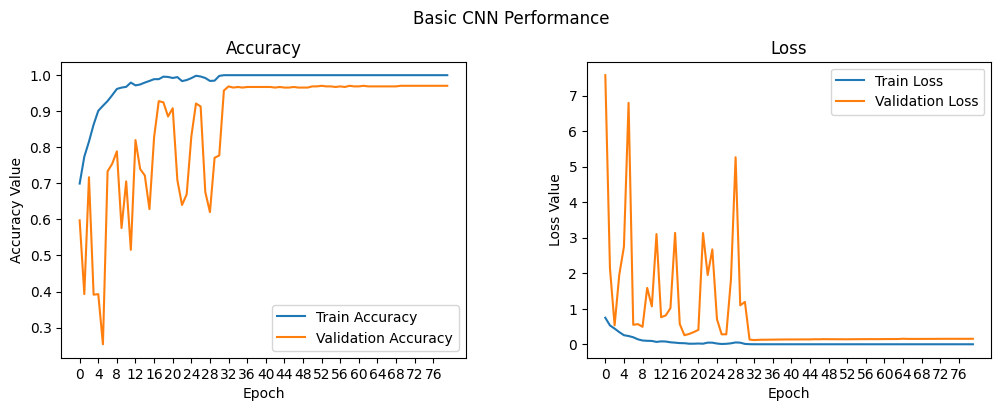

In [ ]:
# Almost identical to source material.

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,80))
ax1.plot(epoch_list, r.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, r.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 80, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, r.history['loss'], label='Train Loss')
ax2.plot(epoch_list, r.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 80, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
pred=model.predict(testx)
Y_pred = np.argmax(pred, 1)
print(Y_pred.shape, testy.shape)

20/20 [==============================] - 1s 49ms/step
(611,) (611,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Confusion Matrix')
print(confusion_matrix(testy, Y_pred))
# About as good as the source material.

Confusion Matrix
[[137   5   2]
 [  7 277   1]
 [  1   2 179]]


In [ ]:
print('Classification Report')
target_names = ['Meningioma', 'Glioma', 'Pituitary']
print(classification_report(testy, Y_pred, target_names=target_names))
# Once again, about as good as the original.

Classification Report
              precision    recall  f1-score   support

  Meningioma       0.94      0.95      0.95       144
      Glioma       0.98      0.97      0.97       285
   Pituitary       0.98      0.98      0.98       182

    accuracy                           0.97       611
   macro avg       0.97      0.97      0.97       611
weighted avg       0.97      0.97      0.97       611



0.9883001613770845


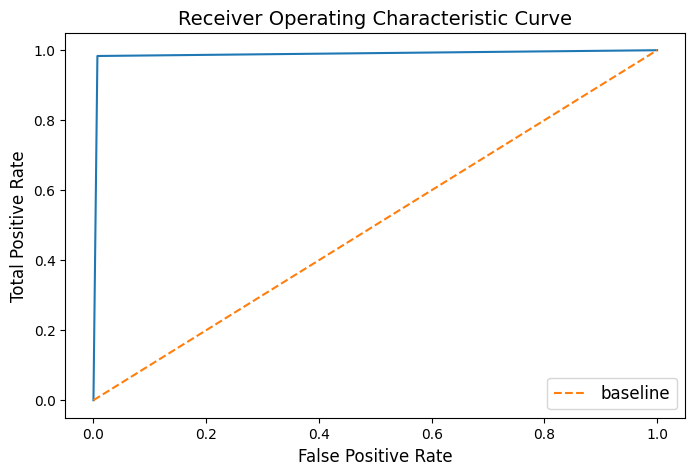

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(testy, Y_pred, pos_label=2)
print(metrics.auc(fpr, tpr))

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=14)
plt.ylabel('Total Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.legend(fontsize=12);

Conclusion: the CNN trained on the Figshare data as used by the source material author(s) works as expected.